<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Описание-исследования" data-toc-modified-id="Описание-исследования-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Описание исследования</a></span></li><li><span><a href="#Цель-исследования." data-toc-modified-id="Цель-исследования.-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Цель исследования.</a></span></li><li><span><a href="#Задачи-исследования." data-toc-modified-id="Задачи-исследования.-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Задачи исследования.</a></span></li><li><span><a href="#Исходные-данные." data-toc-modified-id="Исходные-данные.-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Исходные данные.</a></span></li></ul></li></ul></li><li><span><a href="#Часть-1.-Приоритизация-гипотез-" data-toc-modified-id="Часть-1.-Приоритизация-гипотез--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Часть 1. Приоритизация гипотез <a id="1-bullet" rel="nofollow"></a></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Часть-2.--Анализ-A/B-теста-" data-toc-modified-id="Часть-2.--Анализ-A/B-теста--3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Часть 2.  Анализ A/B-теста <a id="2-bullet" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Общий-вывод-" data-toc-modified-id="Общий-вывод--3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Общий вывод <a id="4-bullet" rel="nofollow"></a></a></span></li></ul></li></ul></div>

## Описание проекта

#### Описание исследования
Исследование данных крупного интернет-магазина. Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки, требуется проверить их.
    
_____
#### Цель исследования.
Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.
    
_____
#### Задачи исследования.

1. Приоритизация гипотез.
2. Анализ A/B-теста.  
Рассчет кумулятивных показателей: 
* выручки по группам;
* среднего чека;
* относительного изменения среднего чека;
* конверсии по группам;
* визуализация данных.  
Анализ статистической значимости различий в конверсии и среднем чеке (по "сырым" и "очищенным" данным).
3. Выработка решений по результатам А/В теста.

_____
#### Исходные данные.
    
Данные по 9 гипотезам по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Результаты A/B-теста.
______

##  Часть 1. Приоритизация гипотез <a id='1-bullet'></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import math
from scipy import stats

from datetime import timedelta
import datetime as dt

from statsmodels.stats.proportion import proportions_ztest
import warnings

from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()


try:
    data = pd.read_csv('hypothesis.csv', sep=',')
    orders = pd.read_csv('orders.csv', sep=',')
    visitors = pd.read_csv('visitors.csv', sep=',')
except:
    data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
    orders = pd.read_csv('/datasets/orders.csv', sep=',')
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

#переведем названия столбцов в нижний регистр для удобства
data.columns = [x.lower() for x in data.columns.values]

data.head(9)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


В исходном датасете:
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [2]:
data['ICE'] = (data['impact'] * data['confidence']) / data['efforts']
pd.options.display.max_colwidth = 150  

data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round()

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Из полученных данных можно сделать вывод, что наиболее перспективные гипотезы по ICE: лидеры 8, 0, 7,  с отрывом 6 и 2. А именно:  
* гипотеза 8 - запустить акцию, дающую скидку на товар в день рождения;
* гипотеза 0 - добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
* гипотеза 7 - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
* гипотеза 6 - показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию;
* гипотеза 2 - добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [3]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']

data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы снова 7, 2, 0, 6 и 8. Однако на первом месте уже гипотеза 7 - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
Так получилось, потому что ее параметр Reach равен 10, в то время как у дргуих гипотез он меньше. Эта гипотеза затронет наибольшее число пользователей.  
Изменение приоретизации гипотез при применении RICE вместо ICE вызвано влиянием параметры Reach, который показывает, скольких пользователей затронет изменение, которое вы хотите внести. Таким образом, оценка ICE сосредоточена на показателях влияния, легкости реализации и уверенности в том, что указанное улучшение будет достигнуто за указанный момент времени. Оценка более субъективна. 

#### Вывод
В результате изучения 9 гипотез по увеличению выручки интернет-магазина с помощью фреймворков ICE и RICE были отобраны наиболее приоритетные гипотезы (7, 2, 0, 6 и 8):
* гипотеза 8 - `запустить акцию, дающую скидку на товар в день рождения`;
* гипотеза 0 - `добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей`;
* гипотеза 7 - `добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`;
* гипотеза 6 - `показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию`;
* гипотеза 2 - `добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа`.

##  Часть 2.  Анализ A/B-теста <a id='2-bullet'></a>

В результате тестирования были получены результаты, описанные в файлах датасетах orders и visitors. Рассмотрим подробнее данные:

In [4]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

В датасете содержатся данные:
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

In [7]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


В датасете содержатся данные:
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [10]:
orders = orders.rename(columns={"transactionId": "orderId", "visitorId": "userId"})

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   orderId  1197 non-null   int64         
 1   userId   1197 non-null   int64         
 2   date     1197 non-null   datetime64[ns]
 3   revenue  1197 non-null   int64         
 4   group    1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Для анализа создадим массив уникальных пар значений дат и групп текста:

In [12]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'orderId' : pd.Series.nunique,
'userId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                         visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']) 

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


1. Построим графики кумулятивной выручки по дням по группам:

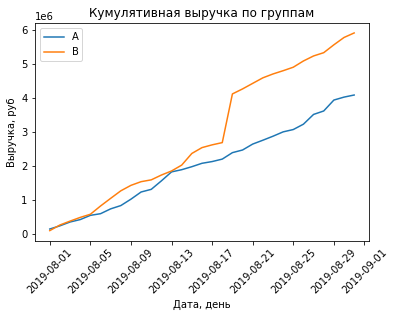

In [13]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'orderId': 'nunique',
            'userId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
import matplotlib.pyplot as plt

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата, день')
plt.ylabel('Выручка, руб')
plt.xticks(rotation=45)
plt.legend();

Вывод. В первой трети графика видно, что выручка увеличивалась практически равномерно, как в группе А, так и в группе B.  Далее сегмент В вырвался вперед и продолжал лидировать весь остаток теста.  Это может быть вызвано как ростом числа заказов, так и появлении заказов с высокой стоимостью в выборке.
2. Построим график кумулятивного среднего чека по группам:

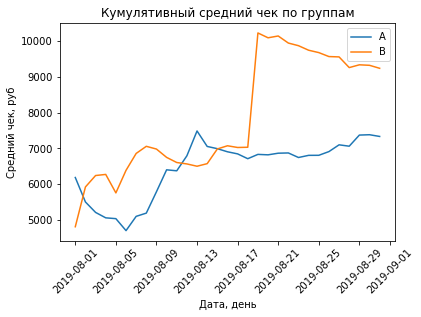

In [14]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xticks(rotation=45)
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата, день')
plt.ylabel('Средний чек, руб')
plt.legend();

Вывод. Кумулятивное значение среднего чека явно не стабильно. После 17.08.2019 значение среднего чека сегмента В резко изменилось и стало выше 10 000. Пик для семента А пришелся на 13.08.2019. Можно сделать вывод о наличии аномальных наблюдений, которые мешают принять решение.  
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A.

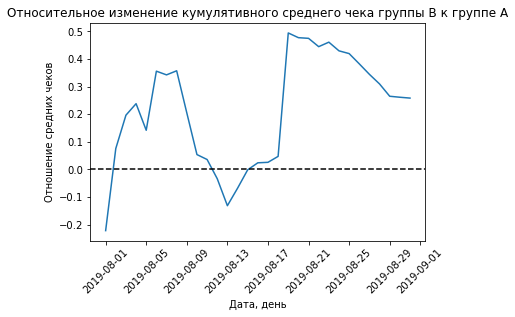

In [15]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата, день')
plt.ylabel('Отношение средних чеков');



Вывод. Наблюдается провал отношения средних чеков (в районе 13.08.2019), обусловленный обнаруженным выше аномальным ростом. В эти дни были совершены наибольшие заказы.  
4. Постройте график кумулятивной конверсии по группам.Добавим  столбец 'conversion' c отношением числа заказов к количеству пользователей в указанной группе в указанный день. Сохраним данные о заказах в сегментах A и B соответственно и построим график.

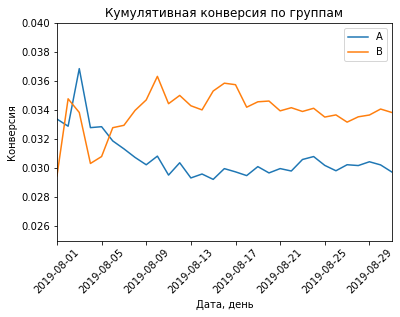

In [16]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title("Кумулятивная конверсия по группам")
plt.xlabel('Дата, день')
plt.ylabel('Конверсия');

# задаем масштаб осей
plt.axis(['2019-08-01', '2019-08-31', 0.025, 0.04]);

Вывод. В начале теста лидирует сегмент А, он имел большую конверсию, но начал снижаться и выровнялся до уровня около 0.03. Сегмент B наоборот начал с 0.03 и стабилизировася на значении 0.034-0.035.  
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Объединим таблицы cumulativeDataA и cumulativeDataB методом merge() так, чтобы она содержала столбцы с датой и конверсией.
Сохраним результаты в переменной mergedCumulativeConversions.

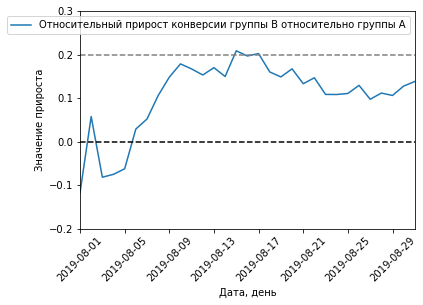

In [17]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
label="Относительный прирост конверсии группы B относительно группы A")
plt.xticks(rotation=45)
plt.xlabel('Дата, день')
plt.ylabel('Значение прироста')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

plt.axis(['2019-08-01', '2019-08-31', -0.2, 0.3]);

Вывод. Приблизительно до 02.08.19 по результатам тестирования группа B проигрывала группе A, после резкого рывка 2.08.19 снова наблюдалось снижение до 05.08.2019. Затем группа снова начала расти приблизительно до 15.08.19 затем разрыв сократился, но группа B все равно выигрывает по сравнению с группой А. В целом статические отношение конверсий между группами ещё не установилось, поэтому сделать окончательный вывод нельзя.  
6. Построим точечный график количества заказов по пользователям. Найдем число заказов по пользователям — создадим датафрейм c двумя столбцами: userId, orders. Назовем его ordersByUsers.

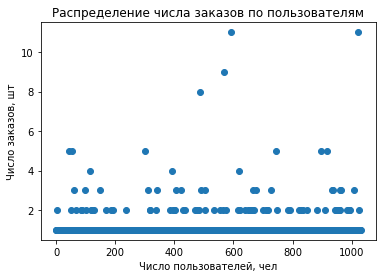

In [18]:
#orders.head()
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.title('Распределение числа заказов по пользователям')
plt.xlabel('Число пользователей, чел')
plt.ylabel('Число заказов, шт')
plt.scatter(x_values, ordersByUsers['orders']);

Вывод. Пользователей, совершивших заказ более 2 раз, не так мало. Они могут быть аномальными.  
Анализ кумулятивных метрик показал, что:
* выручка увеличивается в течение всего теста довольно равномерно. На начало теста сегмент B пошел вверх и лидировал;
* кумулятивное значение среднего чека довольно нестабильное. С 17.08.2019 со средним чеком сегмента В что-то произошло, и он резко увеличился;
* результаты теста относительного различия кумулятивного среднего чека группы B к группе A значительно менялись в нескольких датах. Вероятно, в эти дни были соверешены большие заказы;
* на начало теста группа А имел большую конверсию, но после снизился и выровнялся до уровня 0,03. Группа B наоборот начала с 0.03 и стабилизировалась на значении 0,034-0,035;
* отношение конверсии (относительного различия кумулятивной конверсии группы B к группе A) ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя.  
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [19]:
# Метод np.percentile('column', [percentile1, percentile2]) находит перцентили.
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% (100-95) пользователей совершали больше 2 заказов, при этом не более 1% (100-99) пользователей - больше 4 заказов.  
8. Постройте точечный график стоимостей заказов.

         orderId      userId       date  revenue group
425    590470918  1920142716 2019-08-19  1294500     B
1196  3936777065  2108080724 2019-08-15   202740     B
858    192721366  1316129916 2019-08-27    93940     A
1136   666610489  1307669133 2019-08-13    92550     A
744   3668308183   888512513 2019-08-27    86620     B
682   1216533772  4266935830 2019-08-29    78990     B
662   1811671147  4266935830 2019-08-29    78990     A
743   3603576309  4133034833 2019-08-09    67990     A
1103  1348774318  1164614297 2019-08-12    66350     A
1099   316924019   148427295 2019-08-12    65710     A


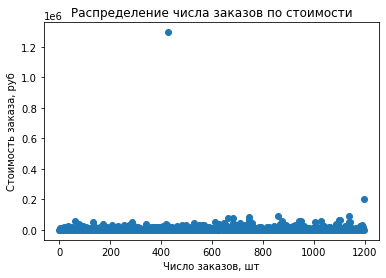

In [20]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.title('Распределение числа заказов по стоимости')
plt.xlabel('Число заказов, шт')
plt.ylabel('Стоимость заказа, руб')
plt.scatter(x_values, orders['revenue']);

Вывод. Наблюдаются точечные выбросы - слишком высокие значения стоимости заказа.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [21]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Вывод. Не более, чем у 5% заказов чек дороже 28 000. И не больше, чем у 1% заказов чек дороже 58 233 т.р.  
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным.
Получили множество аномальных пользователей. Сформулируем гипотезы
* Н0 - различия в конверсии между группами по «очищенным» данным статистически не значимы (различий в конверсии между группами нет);
* Н1 - различия в конверсии между группами по «очищенным» данным статистически значимы;
* при уровне значимости alpha = 5%. 

In [22]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Вывод. P-value по конверсии до очистки данных: 0.017. Относительный прирост конверсии группы B: 0.138. P-value значительно меньше 0,05, потому нулевую гипотезу отвергаем. Анализ "сырых данных" сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к группе А равен 13,8%.   
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

In [23]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


Вывод. P-value по среднему чеку до очистки данных: 0.729 > 0,05. Относительный прирост конверсии группы B: 0.259. P-value значительно больше 0,05, Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем. При этом средний чек группы B значительно выше среднего чека группы A (25,9%).  
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным.  
Так как 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233,2 рублям. А 95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя.
Примем за аномальных пользователей тех, кто совершил 4 заказа и более, или совершил заказ на сумму свыше 30 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

In [24]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: userId, dtype: int64


12. Получили множество аномальных пользователей. Посчитаем статистическую значимость различия конверсии после удаления аномальных пользователей.

In [25]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01884
0.144


Вывод. Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент B значительно лучше сегмента А.  
13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
Сформулируем гипотезы
* Н0 - различия в среднем чеке заказа между группами по «очищенным» данным статистически не значимы
* Н1 - различия в среднем чеке заказа между группами по «очищенным» данным статистически значимы
* alpha 5%.

In [26]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.979
-0.017


Вывод. P-value по среднему чеку после очистки данных: 0.979. Относительный прирост конверсии группы B: - 0.017. P-value значительно больше 0,05, потому статистически значимых отличий между группами нет. 

14. Примем решение по результатам теста.  
Варианты решений:  
* Остановить тест, зафиксировать победу одной из групп.  
* Остановить тест, зафиксировать отсутствие различий между группами.  
* Продолжить тест.  
Тест следует остановить и признать его успешным в случае, если нам достаточно улучшения метрики - конверсии. Если важно добиться улучшения двух метрик (конверсия и средний чек), то тест следует остановить и признать неуспешным. Таким образом, нужно остановить тест и зафиксировать победу группы В. Группа B статистически значимо лучше группы A по метрике конверсии, но различий в средних чеках нет. Требовалось проанализировать гипотезу по увеличению выручки, поэтому показатель конверсии наиболее важен. Коверсия оказывает влияние на выручку, отсюда можно сделать вывод, что раз конверсия в случае группы В существенно увеличилась, то увеличилась и выручка.

### Общий вывод <a id='4-bullet'></a>

В результате проведенного анализа сделаны следующие выводы:
* В первой части проекта было изучено 9 гипотез и выполнена приоритизация с помощью фреймворков ICE и RICE. 
Наиболее перспективная гипотеза по ICE (влияние, уверенность, усилия) гипотеза 8 - `запустить акцию, дающую скидку на товар в день рождения`. У ее наиболее высокие Impact и Confidence.
* По RICE лидирует гипотеза 7 - `добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`, затрагивающее большее число пользователей.
* Были проанализированы кумулятивные метрики. Установлено, что в данных кумулятивной выручки, кумулятивной конверсии и среднего чека наблюдается выбросы (аномальные значения), наблюдаются всплески дорогих заказов и нетипичные изменения среднего чека. Анализ относительного различия кумулятивной конверсии группы B к группе A показало отсутствие устоявшегося соотношения конверсий между группами. 
График конверсий ассиметричен, первоначально преобладала группа А, затем группа В, а конверсия группы А снизилась и также зафиксировалась.
Было проведено дальнейшее исследование.
* Выявлены аномалии в отношении числа заказов и их стоимости.
* Изучена статистическая сначимость различий в среднем чеке и конверсии по «сырым» и «очищенным» данным.
Получены такие результаты:
* статистически значимые различия по конверсии между группами по «сырым» и по данным после фильтрации зафиксированы;
* нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации;
* тест был остановлен, зафиксирована победа группы B.
